In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_excel('baseball.xlsx',dtype='float32')
data = data.values

X = data[:, :5]
Y = data[:, 5]

print("X:", X)
print("Y", Y)

X: [[0.144 0.049 0.012 0.013 0.086]
 [0.125 0.039 0.013 0.002 0.062]
 [0.141 0.045 0.021 0.013 0.074]
 [0.189 0.043 0.001 0.03  0.032]
 [0.161 0.044 0.011 0.07  0.076]
 [0.186 0.047 0.018 0.05  0.007]
 [0.106 0.036 0.008 0.012 0.095]
 [0.117 0.03  0.006 0.003 0.145]
 [0.174 0.05  0.008 0.061 0.112]
 [0.094 0.041 0.005 0.014 0.124]
 [0.147 0.047 0.012 0.009 0.111]
 [0.141 0.058 0.01  0.011 0.07 ]
 [0.135 0.041 0.009 0.005 0.065]
 [0.1   0.037 0.003 0.004 0.138]
 [0.189 0.058 0.014 0.011 0.032]
 [0.149 0.05  0.012 0.05  0.06 ]
 [0.119 0.04  0.008 0.049 0.233]
 [0.158 0.038 0.013 0.003 0.068]
 [0.259 0.06  0.016 0.085 0.158]
 [0.193 0.066 0.021 0.037 0.083]
 [0.155 0.051 0.02  0.012 0.04 ]
 [0.197 0.052 0.008 0.054 0.095]
 [0.133 0.037 0.003 0.043 0.135]
 [0.196 0.063 0.026 0.01  0.031]
 [0.206 0.054 0.027 0.01  0.048]
 [0.11  0.025 0.006 0.    0.061]
 [0.096 0.044 0.003 0.022 0.151]
 [0.193 0.063 0.02  0.037 0.081]
 [0.154 0.045 0.008 0.    0.252]
 [0.204 0.053 0.017 0.013 0.07 ]
 [0.141

In [21]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
Y_hot = tf.squeeze(tf.one_hot(Y,3))
print(Y_hot)

Tensor("Squeeze_4:0", shape=(45, 3), dtype=float32)


In [22]:
W = tf.Variable(tf.random_normal([5, 3]))
b= tf.Variable(tf.random_normal([3]))

hypothesis = tf.nn.softmax(tf.matmul(X,W) + b)
cost = tf.reduce_mean( -tf.reduce_sum(Y_hot*tf.log(hypothesis),axis=1))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=3)

train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())


Step:    0	cost:1.146490

Step:10000	cost:0.497983

Step:20000	cost:0.465473

Step:30000	cost:0.446485

Step:40000	cost:0.432803

Step:50000	cost:0.422196

Step:60000	cost:0.413693

Step:70000	cost:0.406742

Step:80000	cost:0.400979
정확도:82.22


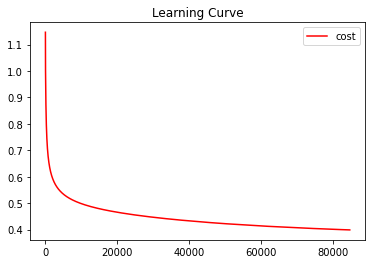

In [23]:
cost_list = []
for step in range(300000):
  train_val, cost_val, W_val, b_val = sess.run([train, cost, W, b])
  if step%10000 == 0:
    print("\nStep:%5d\tcost:%.6f"%(step, cost_val))
  if step != 0:
    if prev_cost - cost_val < 0.0000003:
      break
  prev_cost = cost_val
  cost_list.append(cost_val)
  

predict = sess.run(tf.argmax(hypothesis, -1))
accuracy = np.mean(np.equal(Y,predict))

print(f"정확도:{accuracy*100:.2f}")
plt.plot(cost_list, c='r', label='cost')
plt.title("Learning Curve")
plt.legend(loc='upper right')